<a href="https://colab.research.google.com/github/motomura-s/korean-onomatopoeia-list/blob/main/text_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.korean.go.kr/synap/skin/doc.html?fn=54ec16d4-39eb-45f4-88bc-cc6e600e064a_0.hwp&rs=/attachFile/viewer/202412

In [1]:
import re

In [37]:
raw_text = open("raw_text.txt", "r").read()

In [39]:
pattern = re.compile('[가-힣]+')
matches = pattern.findall(raw_text)
len(matches), len(set(matches)), matches[:10]

(29059,
 26687,
 ['가굴가굴',
  '가굴가굴하다',
  '가꾸러뜨리다',
  '가꾸러지다',
  '가꾸러트리다',
  '가꾸로',
  '가년스럽다',
  '가년스레',
  '가누다',
  '가닐'])

In [40]:
with open("words.txt", "w") as f:
    f.write("\n".join(sorted(set(matches))))

In [2]:
words = open("words.txt").read().splitlines()
len(words)

26687

In [86]:
!pip install hgtk japanize-matplotlib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [88]:
import hgtk
import itertools
import japanize_matplotlib
import matplotlib.pyplot as plt

In [36]:
for i in range(1, 5):
    print(i)
    for template in itertools.product(["CV", "CVC"], repeat=i):
        print('"'+f"{''.join(template)}"+ '"' + ": [],")

1
"CV": [],
"CVC": [],
2
"CVCV": [],
"CVCVC": [],
"CVCCV": [],
"CVCCVC": [],
3
"CVCVCV": [],
"CVCVCVC": [],
"CVCVCCV": [],
"CVCVCCVC": [],
"CVCCVCV": [],
"CVCCVCVC": [],
"CVCCVCCV": [],
"CVCCVCCVC": [],
4
"CVCVCVCV": [],
"CVCVCVCVC": [],
"CVCVCVCCV": [],
"CVCVCVCCVC": [],
"CVCVCCVCV": [],
"CVCVCCVCVC": [],
"CVCVCCVCCV": [],
"CVCVCCVCCVC": [],
"CVCCVCVCV": [],
"CVCCVCVCVC": [],
"CVCCVCVCCV": [],
"CVCCVCVCCVC": [],
"CVCCVCCVCV": [],
"CVCCVCCVCVC": [],
"CVCCVCCVCCV": [],
"CVCCVCCVCCVC": [],


In [59]:
words_by_template = {
    # 1文字
    "CV": [], # 새
    "CVC": [], # 뺨
    # 2文字
    "CVCV": [], # 뛰뛰
    "CVCVC": [], # 매옴
    "CVCCV": [], # 멍추
    "CVCCVC": [], # 멀뚱
    # 3文字
    "CVCVCV": [], # 두르르
    "CVCCVCV": [], # 갈기다
    "CVCVCCV": [], # 나긋이
    "CVCVCVC": [], # 푸드덕
    "CVCCVCCV": [], # 뻔뻔히
    "CVCCVCVC": [], # 콩다콩
    "CVCVCCVC": [], # 차근덕
    "CVCCVCCVC": [], # 쿵닥딱
    # 4文字
    "CVCVCVCV": [], # 꼬지꼬지
    "CVCVCVCVC": [], # 가마아득
    "CVCVCVCCV": [], # 미치광이
    "CVCVCVCCVC": [], # 두리둥둥
    "CVCVCCVCV": [], # 푸석대다
    "CVCVCCVCVC": [], # 후들후들
    "CVCVCCVCCV": [], # 게름뱅이
    "CVCVCCVCCVC": [], # 화닥뚝닥
    "CVCCVCVCV": [], # 살그머니
    "CVCCVCVCVC": [], # 뱐미주룩
    "CVCCVCVCCV": [], # 옹기옹기
    "CVCCVCVCCVC": [], # 할래발딱
    "CVCCVCCVCV": [], # 몽톡하다
    "CVCCVCCVCVC": [], # 납죽스름
    "CVCCVCCVCCV": [], # 알금뱅이
    "CVCCVCCVCCVC": [], # 훌떡훌떡
}
for word in words:
    jamos = hgtk.text.decompose(word, compose_code="/").strip("/").split("/")
    if len(jamos) == 1:
        if len(jamos[0]) == 2:
            words_by_template["CV"].append(word)
        elif len(jamos[0]) == 3:
            words_by_template["CVC"].append(word)
    elif len(jamos) == 2:
        if len(jamos[0]) == 2 and len(jamos[1]) == 2:
            words_by_template["CVCV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3:
            words_by_template["CVCVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2:
            #if word.endswith("다"):
                #print(word)
            #    continue
            words_by_template["CVCCV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3:
            words_by_template["CVCCVC"].append(word)
    elif len(jamos) == 3:
        if len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 2:
            words_by_template["CVCVCV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 2:
            words_by_template["CVCCVCV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 2:
            words_by_template["CVCVCCV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 3:
            words_by_template["CVCVCVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 2:
            words_by_template["CVCCVCCV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 3:
            words_by_template["CVCCVCVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 3:
            words_by_template["CVCVCCVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 3:
            words_by_template["CVCCVCCVC"].append(word)
    elif len(jamos) == 4:
        if len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 2 and len(jamos[3]) == 2:
            words_by_template["CVCVCVCV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CVCVCVCVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 3 and len(jamos[3]) == 2:
            words_by_template["CVCVCVCCV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 3 and len(jamos[3]) == 3:
            words_by_template["CVCVCVCCVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 2:
            words_by_template["CVCVCCVCV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CVCVCCVCVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 3 and len(jamos[3]) == 2:
            words_by_template["CVCVCCVCCV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CVCVCCVCVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 3 and len(jamos[3]) == 3:
            words_by_template["CVCVCCVCCVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 2 and len(jamos[3]) == 2:
            words_by_template["CVCCVCVCV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CVCCVCVCVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 3 and len(jamos[3]) == 2:
            words_by_template["CVCCVCVCCV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 3 and len(jamos[3]) == 3:
            words_by_template["CVCCVCVCCVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 2:
            words_by_template["CVCCVCCVCV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CVCCVCCVCVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 3 and len(jamos[3]) == 2:
            words_by_template["CVCCVCCVCCV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 3 and len(jamos[3]) == 3:
            words_by_template["CVCCVCCVCCVC"].append(word)

In [78]:
pruned_words_by_template = {}
for template, words in words_by_template.items():
    pruned = []
    for word in words:
        if word.endswith("다"):
            continue
        if word.endswith("히"):
            # 確認できた例外
            # 히 히히 이히히
            continue
        elif word.endswith("이"):
            # 아이 어이 이이
            continue
        pruned.append(word)
    pruned_words_by_template[template] = pruned

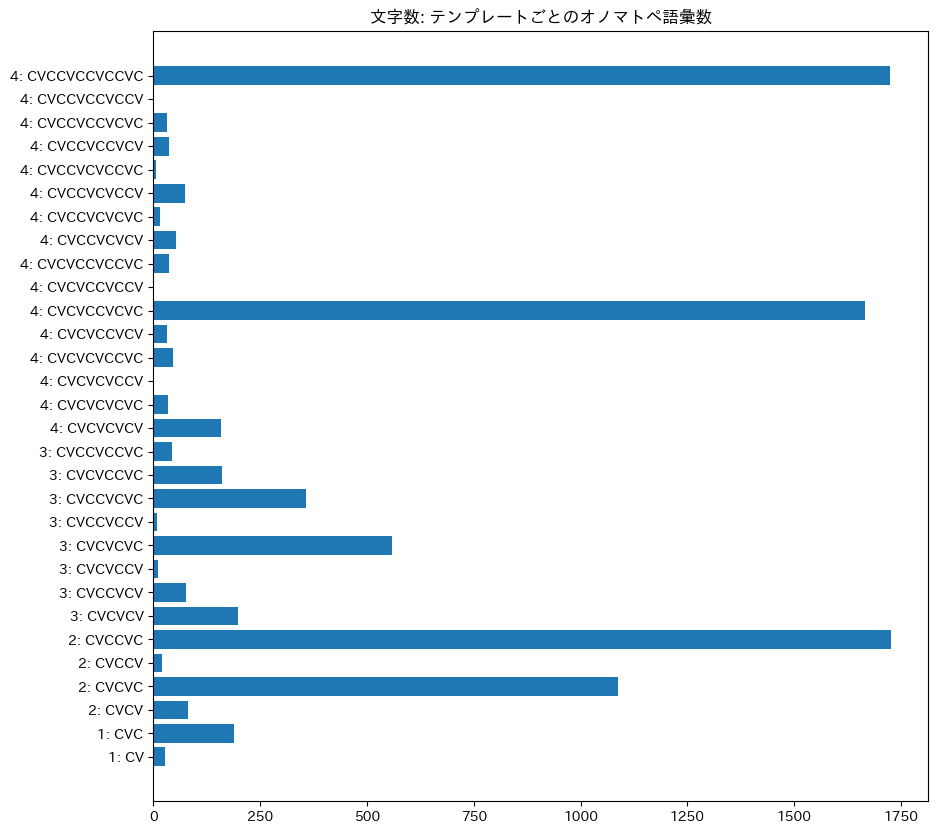

In [89]:
cnt_dic = {k: len(v) for k, v in pruned_words_by_template.items()}

plt.figure(figsize=(10, 10))
plt.barh(range(len(pruned_words_by_template)), cnt_dic.values(), tick_label=[f"{k.count('V')}: {k}"for k in cnt_dic.keys()]) # Vの数は文字数
plt.title("文字数: テンプレートごとのオノマトペ語彙数")
plt.show()